<a href="https://colab.research.google.com/github/AnaCristina1972/projett/blob/master/AulaCNN_aumentodedados_transferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <h3 align="center"> **Classificação de Imagens Coloridas Utilizando CNN**</h3>


Nesta aula nós criaremos uma CNN para classificar imagens. A rede será criada utilizando o modelo `tf.keras.Sequential` e os dados serão carregados utilizando o `tf.keras.preprocessing.image.ImageDataGenerator`.

# Importando os pacotes

Como de hábito, vamos importar os os pacotes necessários:

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Carregando os dados

O nosso classificador será construído para resolver um problema de classificação binária: cão vs gato. Para isso, nós utilizaremos a base de dados Dogs vs Cats.
A base de dados que será utilizada é uma versão menor da base <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">Dogs vs. Cats</a> do Kaggle.

É importante também destacar que nós utilizaremos uma classe do Keras localizada no `keras.preprocessing.image` que é o `tf.keras.preprocessing.image.ImageDataGenerator`, o qual permite configurar geradores Python que podem transformar automaticamente arquivos de imagem
no disco em lotes de tensores pré-processados. Portanto, será necessário carregar a base de dados da URL.

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

Vamos verificar a estrutura de diretório da base de dados.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

Aqui nós criamos variáveis para atribuí-las aos caminhos corretos das partições de treino e de validação da base de dados.

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # diretório com as imagens de treinamento da classe cat
train_dogs_dir = os.path.join(train_dir, 'dogs')  # diretório com as imagens de treinamento da classe dog
validation_cats_dir = os.path.join(validation_dir, 'cats')  # diretório com as imagens de validação da classe cat
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # diretório com as imagens de validação da classe dog

### Vamos entender um pouco a nossa base de dados?

Abaixo nós verificaremos a quantidade de instâncias das classes cão e gato tanto na base de treino quanto na bse de validação.

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total de images de gatos na base de treino:', num_cats_tr)
print('total de images de cães na base de treino:', num_dogs_tr)

print('total de images de gatos na base de validação:', num_cats_val)
print('total de images de cães na base de treino:', num_dogs_val)
print("--")
print("Total de imagens de treino:", total_train)
print("Total de imagens de validação:", total_val)

total de images de gatos na base de treino: 1000
total de images de cães na base de treino: 1000
total de images de gatos na base de validação: 500
total de images de cães na base de treino: 500
--
Total de imagens de treino: 2000
Total de imagens de validação: 1000


# Definindo alguns parâmetros do modelo

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150  # As imagens terão dimensão 150 x 150

# Preparação dos Dados

As imagens devem ser formatadas em tensores de ponto flutuante devidamente pré-processados ​​antes de serem apresentados à rede. As etapas necessárias para realizar essa tarefa são:

1. Ler as imagens do disco
2. Decodificar o conteúdo dessas imagens para convertê-las ao formato de "grade" adequado de acordo com seu conteúdo RGB
3. Converter os dados em tensores de ponto flutuante
4. Redimensionar os tensores com valores entre 0 e 255 para valores entre 0 e 1 (como você sabe, redes neurais preferem lidar com pequenos valores de entrada).

Todas essas tarefas são feitas pela classe **tf.keras.preprocessing.image.ImageDataGenerator**, através dos dois códigos abaixo.

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Gerador para os dados de treinamento
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Gerador para os dados de teste

Depois de definidos os geradores das imagens de treinamento e de validação, o método **flow_from_directory** carrega as imagens do disco, re-escala, e redimensiona as imagens usando uma única linha de código.

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


### Visualizando as imagens de treinamento

É possível visualizar as instâncias de treinamento ao selecionarmos um lote (batch) de imagens do gerador da base de treinamento e plotar algumas imagens usando o `matplotlib`.

In [ ]:
sample_training_images, _ = next(train_data_gen)

A função `abaixo` retorna um lote da base de dados. Um lote é uma tupla de (*muitas imagens*, *muitos rótulos*). Entretanto, os rótulos não serão considerados na visualização, pois nós queremos ver apenas as imagens.

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(sample_training_images[:5])  # Plotar imagens de 0 a 4

# Criação do modelo

## Definição do modelo

O nosso modelo será composto por quatro blocos de convolução, com uma camada de max pooling layer entre esses blocos. Na sequência, temos a rede totalmente conectada com 512 neurônios, todos utilizando função de ativação `relu`. O modelo produzirá probabilidades de classes para duas classes — dogs e cats — usando `softmax`.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

### Sumário do modelo

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Compilando o modelo

O otimizador utilizado será o `adam`. Como a camada de saída utiliza a função softmax com dois neurônios de saída, a função de perda será a  `sparse_categorical_crossentropy`. o argumento de métrica é utilizado para que o valor da acurácia na validação e no treino sejam exibidos para cada época de treinamento.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Treinamento do modelo

A rede será treinada durante 100 épocas. Na aula serão apenas 20 épocas.

In [ ]:
EPOCHS = 20
history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen,
)

Epoch 1/20
20/20 [==============================] - 12s 251ms/step - loss: 0.7390 - accuracy: 0.4995 - val_loss: 0.6912 - val_accuracy: 0.5410
Epoch 2/20
20/20 [==============================] - 6s 290ms/step - loss: 0.6899 - accuracy: 0.5250 - val_loss: 0.6884 - val_accuracy: 0.6050
Epoch 3/20
20/20 [==============================] - 5s 239ms/step - loss: 0.6750 - accuracy: 0.5760 - val_loss: 0.6629 - val_accuracy: 0.6040
Epoch 4/20
20/20 [==============================] - 6s 295ms/step - loss: 0.6411 - accuracy: 0.6325 - val_loss: 0.6391 - val_accuracy: 0.6370
Epoch 5/20
20/20 [==============================] - 5s 244ms/step - loss: 0.6021 - accuracy: 0.6715 - val_loss: 0.6346 - val_accuracy: 0.6320
Epoch 6/20
20/20 [==============================] - 5s 233ms/step - loss: 0.5661 - accuracy: 0.7095 - val_loss: 0.5940 - val_accuracy: 0.6880
Epoch 7/20
20/20 [==============================] - 6s 273ms/step - loss: 0.5034 - accuracy: 0.7495 - val_loss: 0.5583 - val_accuracy: 0.7080
Epoch

### Visualizando os resultados do treinamento

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acuracia no treino')
plt.plot(epochs_range, val_acc, label='Acuracia na validacao')
plt.legend(loc='lower right')
plt.title('Acuracia no treino na validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda no treino')
plt.plot(epochs_range, val_loss, label='Perda na validacao')
plt.legend(loc='upper right')
plt.title('Perda no treino e na validacao')
plt.show()

Conforme pode ser observado nas figuras, a acurácia no treino e na validação divergem bastante. O modelo alcança cerca de **70%** de acurácia na validação, dependendo do número de épocas utilizado.

Essa é uma indicação clara de *overfitting*. Quando as curvas de treinamento e de validação começam a divergir, o modelo começa a memorizar os dados de treinamento e provavelmente será incapaz de um bom desempenho na base de validação.

## <h3 align="center"> **Classificação de Imagens com Aumento de Dados**</h3>


Vamos continuar a trabalhar com classificação de imagens utilizando a base **Dogs vs Cats**. Nós utilizaremos novamente o modelo `tf.keras.Sequential` e os dados serão processados utilizando o `tf.keras.preprocessing.image.ImageDataGenerator`.

## Objetivo:
* _Overfitting_ - como podemos reduzir?
Nós utilizaremos _Data Augmentation_ and _Dropout_ como regularizadores para controlar overfitting.



<hr>

# Aumento de Dados

Uma maneira de corrigir o problema de overfitting é **aumentar a base de dados** de treinamento para que tenha um número **suficiente e variado** de instâncias. O aumento de dados adota a abordagem de aumentar as instâncias de treinamento ao gerar variantes realistas das instâncias de treinamento existentes. O aumento ocorre por meio de **transformações aleatórias** que produzem imagens de aparência realista/confiável. O objetivo é que, na hora do treinamento, o modelo **nunca veja** exatamente a mesma imagem duas vezes. Isso faz com que o modelo seja exposto a mais padrões dos dados, permitindo uma **generalização melhor**.

Em **tf.keras** essa ação pode ser implementada usando novamente a classe **ImageDataGenerator**. Essa classe facilita bastante a geração de novos dados, pois, é possível passar as transformações desejadas como argumentos e a função aplicará as transformações na base de treino ao longo do processo de treinamento.

Vamos verificar as transformações que usaremos para aumento de dados durante o treinamento.

In [ ]:
# Esta função plotará uma linha com 5 imagens
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Invertendo a imagem horizontalmente

A operação de inversão horizontal da imagem pode ser obtida ao passar o `horizontal_flip=True` como o argumento para a classe `ImageDataGenerator`.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


Para ver a transformação em ação, vamos pegar uma imagem da base de treinamento e repetí-la cinco vezes. O aumento será aplicado aleatoriamente (ou não) a cada repetição.

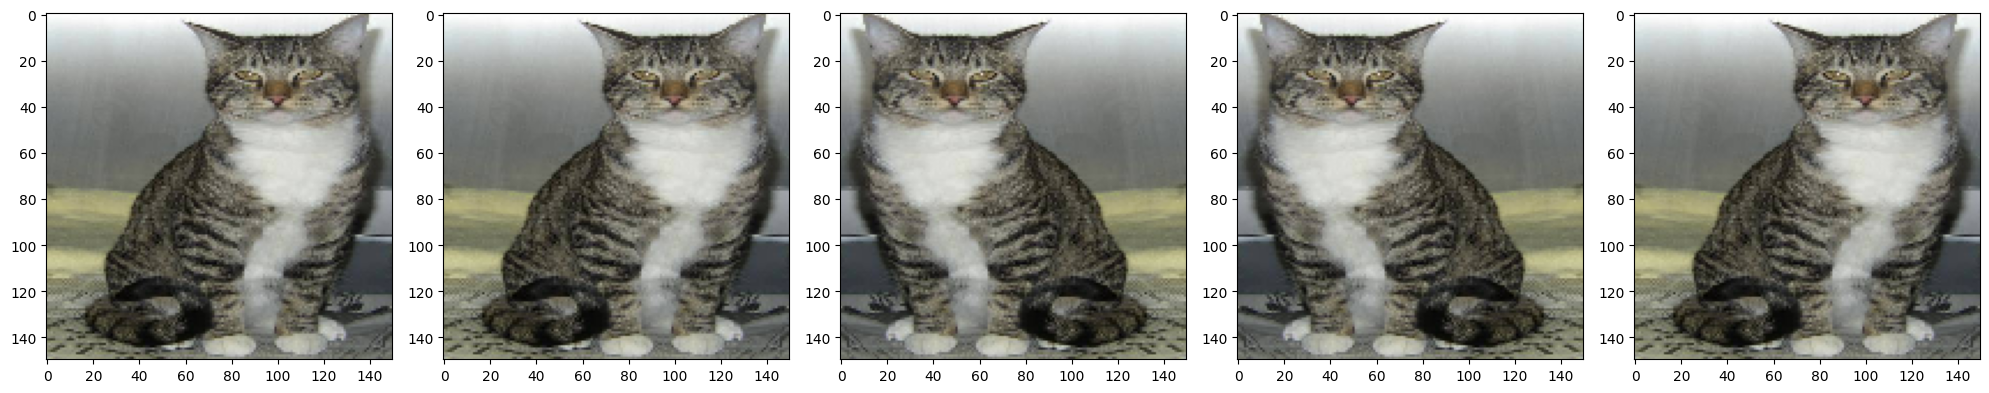

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Rotacionando a imagem

O aumento de dados via rotação girará aleatoriamente a imagem até x graus. Neste exemplo, nós vamos definir x = 45, isto é, a imagem será rotacionada em 45 graus.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


Vamos novamente visualizar o resultado ao pegar uma imagem aleatória da base de treinamento e repetí-la cinco vezes

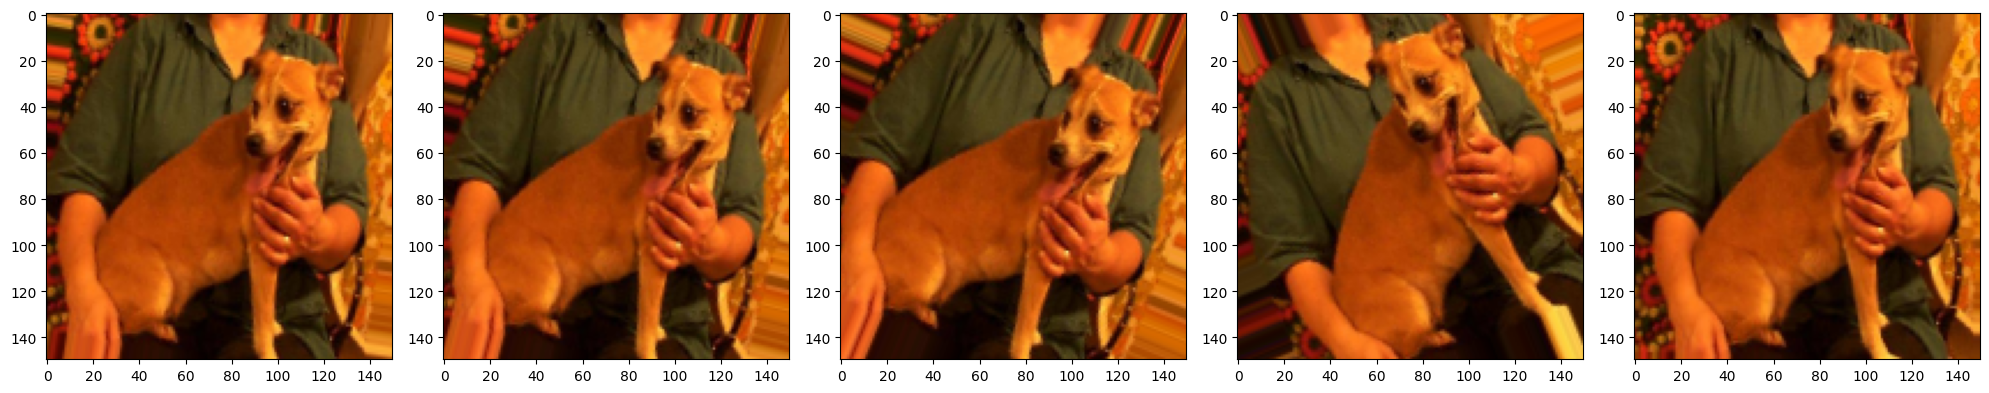

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Aplicando Zoom

Nós também podemos aplicar o aumento do zoom aos dados de treinamento, ampliando as imagens em até 50% de forma aleatória.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


Vamos checar novamente o resultado por meio de um exemplo?

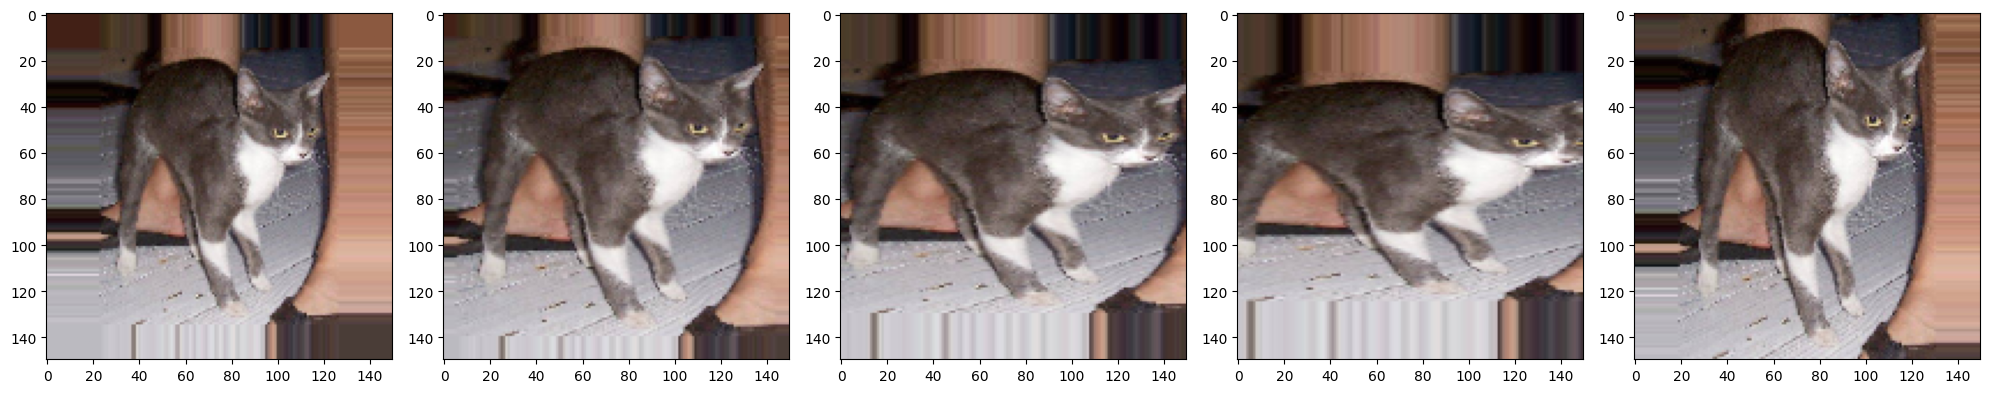

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Combinando tudo

Nós podemos aplicar todas essas operações, além de outras possíveis, de uma única vez, ao escolhermos corretamente os argumentos da função.

O exemplo `a seguir`, são aplicadas as seguintes operações às instâncias de treinamento: redimensionamento, rotação de 40 graus, deslocamento de largura, deslocamento de altura, inversão horizontal e aumento de zoom.

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


No comando `abaixo`, nós vamos visualizar como uma única imagem ficaria cinco vezes diferente quando cinco dessas operações escolhidas aleatoriamente são aplicadas à imagem.

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Criação do Gerador dos dados de validação

Geralmente nós aplicamos aumento de dados somente nos exemplos de treinamento. Portanto, aqui as imagens de validação são apenas redimensionadas e convertidas em lotes usando ImageDataGenerator.

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

## Definição do modelo

O nosso modelo será novamente composto por quatro blocos de convolução, com uma camada de max pooling  entre esses blocos. Entretanto, é adicionada uma camada de Dropout com probabilidade de 0.5 antes da camada totalmente conectada. Essa estratégia também ajuda a evitar overfitting.

 Na sequência, temos a rede totalmente conectada com 512 neurônios, todos utilizando função de ativação `relu`. O modelo produzirá probabilidades de classes para duas classes — dogs e cats — usando `softmax`.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

###Compilando o modelo
O otimizador utilizado será o adam. Como a camada de saída utiliza a função softmax com dois neurônios de saída, a função de perda será a sparse_categorical_crossentropy. o Argumento de métrica é utilizado para que o valor da acurácia na validação e no treino sejam exibidos para cada época de treinamento.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Sumário do modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

### Treinamento do modelo

A rede será treinada durante 100 épocas, mas será utilizada parada antecipada para encerrar o treinamento caso não haja melhoria na base de validação.

In [ ]:
earlystopping = keras.callbacks.EarlyStopping(patience = 5)

In [ ]:
epochs=100
history = model.fit(
    train_data_gen,
    epochs=epochs, callbacks = [earlystopping],
    validation_data=val_data_gen,

)

Epoch 1/100
20/20 [==============================] - 23s 733ms/step - loss: 0.7092 - accuracy: 0.5010 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 16s 774ms/step - loss: 0.6900 - accuracy: 0.5140 - val_loss: 0.6824 - val_accuracy: 0.5690
Epoch 3/100
20/20 [==============================] - 16s 798ms/step - loss: 0.6777 - accuracy: 0.5755 - val_loss: 0.6665 - val_accuracy: 0.6220
Epoch 4/100
20/20 [==============================] - 15s 735ms/step - loss: 0.6755 - accuracy: 0.5915 - val_loss: 0.6555 - val_accuracy: 0.6420
Epoch 5/100
20/20 [==============================] - 15s 729ms/step - loss: 0.6728 - accuracy: 0.5665 - val_loss: 0.6418 - val_accuracy: 0.6270
Epoch 6/100
20/20 [==============================] - 15s 755ms/step - loss: 0.6580 - accuracy: 0.6075 - val_loss: 0.6416 - val_accuracy: 0.6200
Epoch 7/100
20/20 [==============================] - 15s 755ms/step - loss: 0.6481 - accuracy: 0.6090 - val_loss: 0.7107 - val_accuracy:

### Visualizando os resultados do treinamento

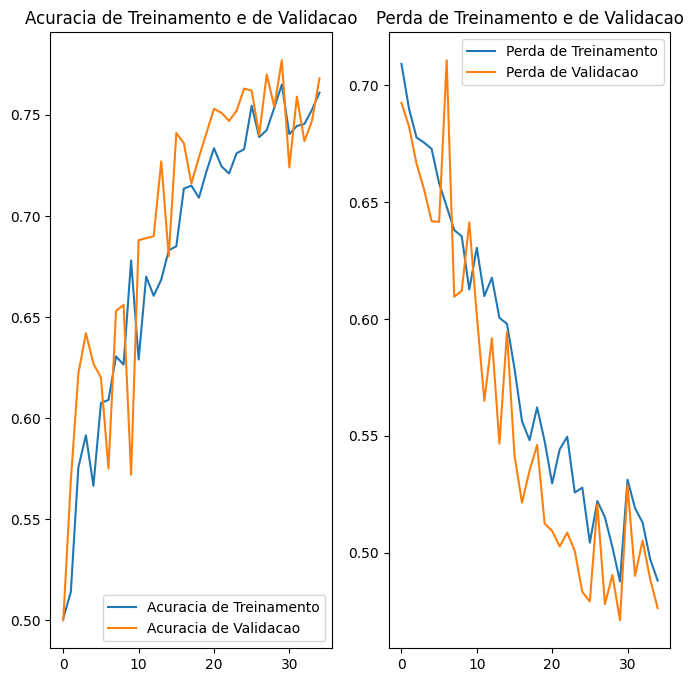

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acuracia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acuracia de Validacao')
plt.legend(loc='lower right')
plt.title('Acuracia de Treinamento e de Validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treinamento')
plt.plot(epochs_range, val_loss, label='Perda de Validacao')
plt.legend(loc='upper right')
plt.title('Perda de Treinamento e de Validacao')
plt.show()

# TensorFlow Hub e Transferência de Aprendizado

[TensorFlow Hub](http://tensorflow.org/hub) é um repositório online de modelos já treinados que podem ser utilizados.
Esses modelos podem ser usados da forma que estão ou em Transferência de Aprendizado.

Transferência de Aprendizado é um processo em que um modelo treinado anteriormente em um tarefa é utilizado para resolver outra tarefa.


Aqui, é possível ver todos os modelos disponíveis no [TensorFlow Module Hub](https://tfhub.dev/).

# Fazendo Transferência de Aprendizado

Com transferência de aprendizado nós reusamos partes de um modelo e mudamos a camada final ou diversas camadas do modelo, e então retreinamos essas camadas na nossa base de dados.

Além dos modelos completos, o TensorFlow Hub também distribui os modelos sem a última camada de classificação. Estes podem ser usados em transferência de aprendizado de forma simples. Vamos utilizar a **MobileNet v2** em nossa tarefa de transferência de aprendizado.

Nós vamos chamar o modelo parcial do TensorFlow Hub (sem a camada de classificação final) de `feature_extractor`. A razão para utilizar esse termo é que essas camadas são responsáveis por identificar o conteúdo de uma imagem, exceto pela criação da distribuição de probabilidade final. Portanto, essas camadas extraem as características das imagens.

In [ ]:
BATCH_SIZE = 32
IMG_SHAPE  = 224  # As imagens terão dimensão 224 x 224, que é a entrada esperada pela MobileNet


Carregando as camadas de extração de características da MobileNet V2 do TF Hub.

In [ ]:
import tensorflow_hub as hub

In [ ]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_SHAPE, IMG_SHAPE,3))

Nós mantemos as variáveis das camadas de extração de características "congeladas" , para que o treinamento modifique somente a camada de classificação.

In [ ]:
feature_extractor.trainable = False

## Adicionando a cabeça de classificação

Vamos utilizar o modelo `tf.keras.Sequential` para adicionar uma nova camada de classificação.

In [ ]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(2)
])

model.summary()

Nós vamos fazer toda a etapa de aumento de dados realizada para o modelo anteior de CNN.

Vamos aplicar as seguintes operações às instâncias de treinamento: redimensionamento, rotação de 40 graus, deslocamento de largura, deslocamento de altura, inversão horizontal e aumento de zoom.

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

### Criação do Gerador dos dados de validação

Geralmente nós aplicamos aumento de dados somente nos exemplos de treinamento. Portanto, aqui as imagens de validação são apenas redimensionadas e convertidas em lotes usando ImageDataGenerator.

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

## Treinamento do modelo
Vamos utilizar parada antecipada

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
earlystopping = keras.callbacks.EarlyStopping(patience = 5)

In [ ]:
epochs=100
history = model.fit(
    train_data_gen,
    epochs=epochs, callbacks = [earlystopping],
    validation_data=val_data_gen,

)

É possível observar que nós obtemos ~ 98% de acurácia na validação, o que é uma grande melhoria em relação ao modelo anterior, onde conseguimos obter aproximadamente 83% de acurácia. A razão para essa diferença é que a MobileNet foi cuidadosamente projetada durante muito tempo por especialistas e depois treinada em um conjunto de dados bem grande (ImageNet).

Vamos plotar os gráficos de accurácia/loss de treinamento e de validação.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acuracia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acuracia de Validacao')
plt.legend(loc='lower right')
plt.title('Acuracia de Treinamento e de Validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treinamento')
plt.plot(epochs_range, val_loss, label='Perda de Validacao')
plt.legend(loc='upper right')
plt.title('Perda de Treinamento e de Validacao')
plt.show()

É interessante observar que o desempenho da validação é melhor do que o desempenho do treinamento, desde o início até o final da execução.

Uma razão para isso é que o desempenho da validação é medido no final da época, mas o desempenho do treinamento é a média dos valores ao longo da época.

A razão maior, porém, é que estamos reutilizando uma grande parte da MobileNet, que já é treinada com várias imagens de cães e gatos. Durante o treinamento, a rede ainda está realizando aumento nas imagens de treinamento, mas não no conjunto de dados de validação. Isso significa que as imagens de treinamento podem ser mais difíceis de classificar em comparação com as imagens normais no conjunto de dados de validação.